In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot
%matplotlib inline
import time

In [ ]:
def convert(imgs, labels, outfile, n):
    imgf = open(imgs, "rb")
    csvf = open(outfile, "w")
    labelf = open(labels, "rb")

    imgf.read(16)
    labelf.read(8)
    images = []

    for i in range(n):
        image = [ord(labelf.read(1))]
        for j in range(28*28):
            image.append(ord(imgf.read(1)))
        images.append(image)

    for image in images:
        csvf.write(",".join(str(pix) for pix in image)+"\n")
    imgf.close()
    csvf.close()
    labelf.close()

In [ ]:
#Respected Sir, Please change the file path so that the code runs smoothly
mnist_train_x = "/content/drive/MyDrive/mnist/train-images.idx3-ubyte"
mnist_train_y = "/content/drive/MyDrive/mnist/train-labels.idx1-ubyte"
mnist_test_x = "/content/drive/MyDrive/mnist/t10k-images.idx3-ubyte"
mnist_test_y = "/content/drive/MyDrive/mnist/t10k-labels.idx1-ubyte"

In [ ]:
#Respected Sir, Please change the file path so that the code runs smoothly
convert(mnist_train_x, mnist_train_y, "/content/drive/MyDrive/mnist/train.csv", 60000)
convert(mnist_test_x, mnist_test_y, "/content/drive/MyDrive/mnist/test.csv", 10000)

In [ ]:
#Respected Sir, Please change the file path so that the code runs smoothly
train_file = open("/content/drive/MyDrive/mnist/train.csv", "r")
train_list = train_file.readlines()
train_file.close()
print(len(train_list))

60000


In [ ]:
train_list[25]

'2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,91,143,255,190,91,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,49,180,246,253,253,253,253,253,220,154,17,3,0,0,0,0,0,0,0,0,0,0,0,0,0,46,107,178,253,253,253,253,253,253,253,253,253,253,253,126,45,0,0,0,0,0,0,0,0,0,0,0,0,107,253,253,253,253,223,220,220,220,220,245,253,253,253,253,106,0,0,0,0,0,0,0,0,0,0,0,0,107,173,253,229,129,12,0,0,0,0,110,253,253,253,253,106,0,0,0,0,0,0,0,0,0,0,0,0,17,14,40,32,0,0,0,0,0,0,57,253,253,253,242,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,139,224,253,253,253,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,178,253,253,253,253,219,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97,250,253,253,253,253,127,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,125,250,253,253,253,245,171,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,41,217,2

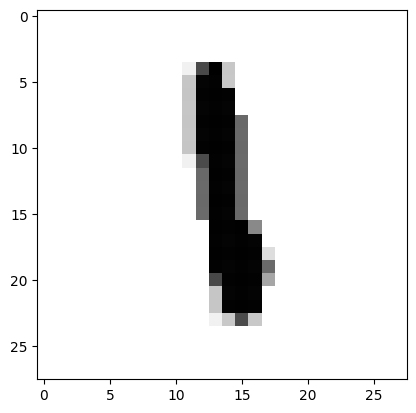

In [ ]:
values = train_list[200].split(",")
image_array = np.asfarray(values [1:]).reshape ((28,28))
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None")

In [ ]:
test_file = open("/content/drive/MyDrive/mnist/test.csv", "r")
test_list = test_file.readlines()
test_file.close()
print(len(test_list))

10000


In [ ]:
class DNN:
  def __init__(self, sizes=[784, 128, 64, 10], epochs=30, lr=0.001):
    self.sizes= sizes
    self.epochs=epochs
    self.lr= lr

    input_layer = sizes[0]
    hidden_1 = sizes[1]
    hidden_2 = sizes[2]
    output_layer = sizes[3]

    self.params = {
        'W1':np.random.randn(hidden_1, input_layer) * np.sqrt(1./hidden_1),
        "W2":np.random.randn(hidden_2, hidden_1) * np.sqrt(1./hidden_2),
        'W3':np.random.randn(output_layer, hidden_2) * np.sqrt(1./output_layer)
    }

  def sigmoid(self, x, derivative=False):
    if derivative:
      return (np.exp(-x))/((np.exp(-x)+1)**2)
    return 1/(1+np.exp(-x))

  def softmax(self, x, derivative=False):
    exps = np.exp(x-x.max())
    if derivative:
      return exps / np.sum(exps, axis=0)*(1-exps / np.sum(exps, axis=0))
    return exps/np.sum(exps, axis=0)

  def forward_pass(self, x_train):
    params = self.params

    params['A0'] = x_train

    # input layer to hidden_1
    params['Z1'] = np.dot(params['W1'], params['A0'])
    params['A1'] = self.sigmoid(params['Z1'])

    #hidden_1 to hidden_2
    params['Z2'] = np.dot(params['W2'], params['A1'])
    params['A2'] = self.sigmoid(params['Z2'])

    # hidden_2 to output_layer
    params['Z3'] = np.dot (params['W3'], params['A2'])
    params['A3'] = self.softmax(params['Z3'])

    return params['Z3']

  def backward_pass (self, y_train, output):
    params = self.params

    change_w = {}

    # calculate W3 update
    error = 2 * (output - y_train) / output.shape [0] * self.softmax(params['Z3'], derivative=True)
    change_w['W3'] = np.outer(error, params['A2'])

    #calculate W2 update
    error = np.dot(params['W3'].T, error) * self.sigmoid(params['Z2'], derivative=True)
    change_w['W2'] = np.outer(error, params['A1'])

    # calculate W1 update
    error = np.dot(params['W2'].T, error) * self.sigmoid(params['Z1'], derivative=True)
    change_w['W1'] = np.outer(error, params['A0'])

    return change_w

  def update_weights(self, change_w):
    for key, val in change_w.items():
      self.params[key] -= self.lr * val

  def compute_accuracy (self, test_data):
    predictions = []
    for x in test_data:
      values = x.split(",")
      inputs = (np.asfarray(values [1:])/ 255.0 * 0.99) + 0.01
      targets = np.zeros(10) + 0.01
      targets[int(values[0])] = 0.99
      output= self.forward_pass(inputs)
      pred = np.argmax (output)
      predictions.append(pred==np.argmax(targets))

    return np.mean(predictions)

  def train(self, train_list, test_list):
    for i in range(self.epochs):
      start_time = time.time()
      for x in train_list:
        values = x.split(",")
        inputs = (np.asfarray(values[1:]) /255.0 * 0.99) + 0.01
        targets = np.zeros (10) + 0.01
        targets[int(values[0])] = 0.99
        output = self.forward_pass(inputs)
        change_w = self.backward_pass(targets, output)
        self.update_weights (change_w)

      accuracy = self.compute_accuracy(test_list)
      print('Epoch: {0}, Time Spent: {1:.02f}s, Accuracy: {2:.2f}%'.format(i+1, time.time()-start_time, accuracy*100))




In [ ]:
dnn = DNN(sizes=[784, 128, 64, 10], epochs=30, lr=0.001)
dnn.train(train_list, test_list)

Epoch: 1, Time Spent: 75.52s, Accuracy: 28.14%
Epoch: 2, Time Spent: 73.04s, Accuracy: 44.28%
Epoch: 3, Time Spent: 70.69s, Accuracy: 54.92%
Epoch: 4, Time Spent: 75.21s, Accuracy: 61.79%
Epoch: 5, Time Spent: 72.44s, Accuracy: 66.46%
Epoch: 6, Time Spent: 75.90s, Accuracy: 69.40%
Epoch: 7, Time Spent: 71.19s, Accuracy: 71.47%
Epoch: 8, Time Spent: 74.32s, Accuracy: 73.19%
Epoch: 9, Time Spent: 77.17s, Accuracy: 74.43%
Epoch: 10, Time Spent: 69.61s, Accuracy: 75.54%
Epoch: 11, Time Spent: 79.57s, Accuracy: 76.65%
Epoch: 12, Time Spent: 71.08s, Accuracy: 77.37%
Epoch: 13, Time Spent: 69.67s, Accuracy: 78.14%
Epoch: 14, Time Spent: 80.28s, Accuracy: 78.92%
Epoch: 15, Time Spent: 71.02s, Accuracy: 79.50%
Epoch: 16, Time Spent: 73.56s, Accuracy: 79.94%
Epoch: 17, Time Spent: 75.98s, Accuracy: 80.49%
Epoch: 18, Time Spent: 71.67s, Accuracy: 80.88%
Epoch: 19, Time Spent: 74.69s, Accuracy: 81.18%
Epoch: 20, Time Spent: 78.55s, Accuracy: 81.43%
Epoch: 21, Time Spent: 74.73s, Accuracy: 81.76%
E